In [1]:
import torch
from torch import nn
import torch.optim as optim
from fastai.vision.all import *
import matplotlib.pyplot as plt
from models_module import my_models
from train_module import training_functions

GRAPH_PATH = "./data/graphs/"

In [2]:
in_channels = 3
out_channels = 10
device = "cuda:2"
resnet_output_shapes = [64, 128, 256, 512]
resnet_layers_depths = [2,2,2,2]
net = my_models.ResNet(3, 10, resnet_output_shapes, resnet_layers_depths, False)
net.to(device)

train_loss = nn.CrossEntropyLoss()

learning_rate = 1e-4
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

batch_size = 10
epoch_num = 30

In [3]:
path = URLs.IMAGENETTE_160

In [4]:
trainloader, valloader = training_functions.prepare_train_and_val_dls(path, batch_size, size=160, num_workers=4)

CPU times: user 32min 52s, sys: 11min 15s, total: 44min 7s
Wall time: 44min 18s


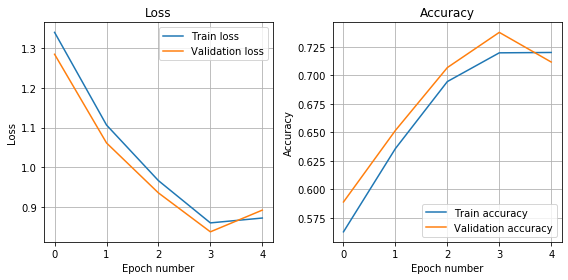

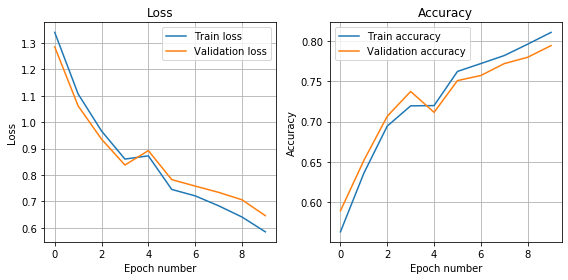

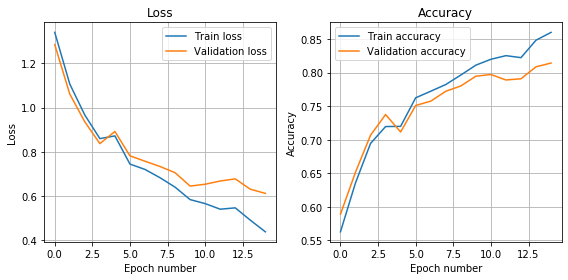

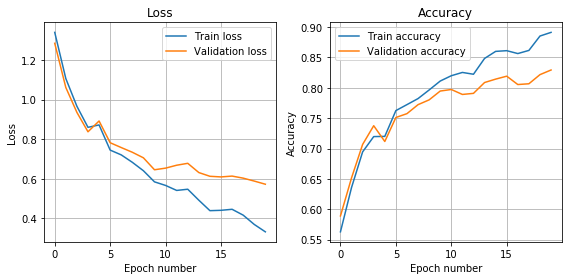

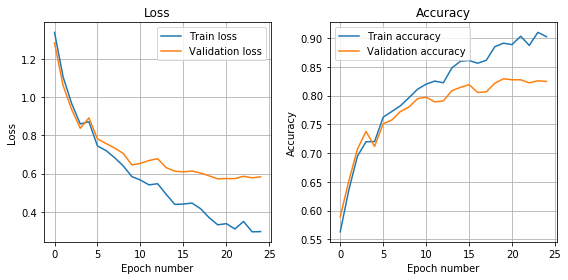

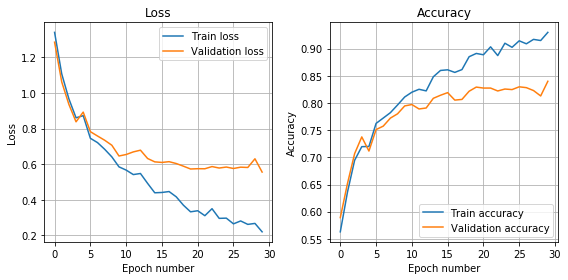

In [5]:
%%time
net, optimization_history = training_functions.train(net, optimizer, 
                                                     train_loss, epoch_num,
                                                     trainloader, valloader, 
                                                     device, GRAPH_PATH+"ResNet_test_info.jpg")

In [6]:
accuracy, conf_matrix, precision, recall, f1 = training_functions.test_metrics(net, device, valloader, out_channels)

print("Test accuracy: ", accuracy)
print("Test precision: ", precision)
print("Test recall: ", recall)
print("Test f-measure: ", f1)

Test accuracy:  0.8392356687898089
Test precision:  0.5082548989353495
Test recall:  0.45864661654135336
Test f-measure:  0.48217814535607106


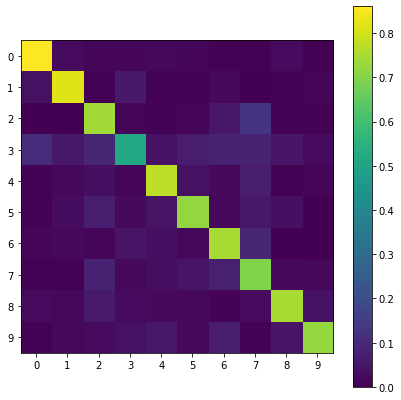

In [7]:
plt.figure(figsize=(7, 7))

plt.imshow(conf_matrix)
plt.xticks(range(conf_matrix.shape[0]))
plt.yticks(range(conf_matrix.shape[0]))
plt.colorbar()
plt.show()

In [8]:
data, labels = valloader.one_batch()

In [9]:
labels_names = ["tench", "English springer", "cassette player", "chain saw", "church", "French horn", "garbage truck", "gas pump", "golf ball", "parachute"]

In [12]:
outputs = net(data.to(device))
_, predicted = torch.max(outputs.detach(), 1)

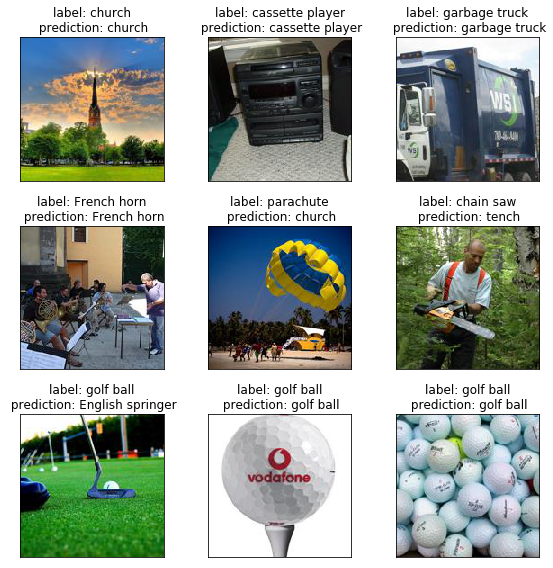

In [13]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(8,8), subplot_kw={'xticks': [], 'yticks': []})

for picture_num, ax in enumerate(axs.flat):
    ax.imshow(data[picture_num].cpu().permute(1, 2, 0))
    ax.set_title("label: {}\n prediction: {}".format(labels_names[labels[picture_num]], 
                                                     labels_names[predicted[picture_num]]))

plt.tight_layout()
plt.show()